In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load the datasets
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

In [16]:
# Display the first few rows of each dataset
print("Real News Sample:")
print(real_news.head())

Real News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [17]:
print("\nFake News Sample:")
print(fake_news.head())


Fake News Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


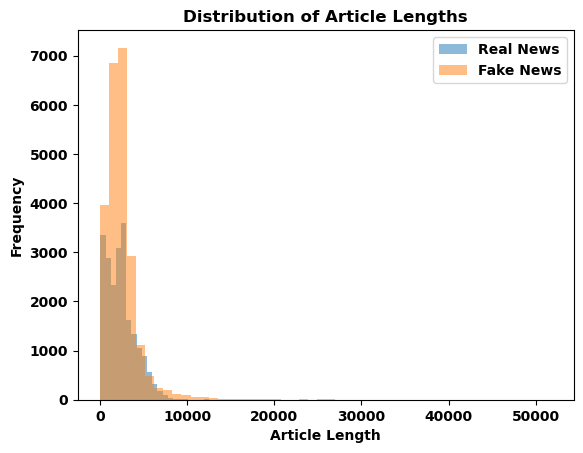

In [18]:
# Plot distribution of article lengths
real_news['text_length'] = real_news['text'].str.len()
fake_news['text_length'] = fake_news['text'].str.len()

plt.hist(real_news['text_length'], bins=50, alpha=0.5, label='Real News')
plt.hist(fake_news['text_length'], bins=50, alpha=0.5, label='Fake News')
plt.legend(loc='upper right')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.show()

The most common words in each dataset

In [19]:
from collections import Counter
import nltk
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])

print('Real News:', real_words)
print('Fake News:', fake_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


## Text Preprocessing

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
        # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])


## spliting the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.994988864142539
Precision: 0.9935498733010827
Recall: 0.9960739030023095
F1 Score: 0.9948102871641102


Hyperparameter tuning: We could tune the hyperparameters of the logistic regression model using methods such as grid search or randomized search to find the optimal set of parameters for our dataset.

In [26]:
from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')


['vectorizer.joblib']